
Загрузка датасета...

Фильтрация данных...

Преобразование целевой переменной...

Анализ типов данных:
_id                          object
TimeStamp                    object
PART_FACT_PLAN_DATE          object
PART_FACT_SERIAL              int64
PART_NAME                    object
EQUIP_CD                     object
EQUIP_NAME                   object
PassOrFail                    int64
Reason                       object
Injection_Time              float64
Filling_Time                float64
Plasticizing_Time           float64
Cycle_Time                  float64
Clamp_Close_Time            float64
Cushion_Position            float64
Switch_Over_Position        float64
Plasticizing_Position       float64
Clamp_Open_Position         float64
Max_Injection_Speed         float64
Max_Screw_RPM               float64
Average_Screw_RPM           float64
Max_Injection_Pressure      float64
Max_Switch_Over_Pressure    float64
Max_Back_Pressure           float64
Average_Back_Pressure       floa

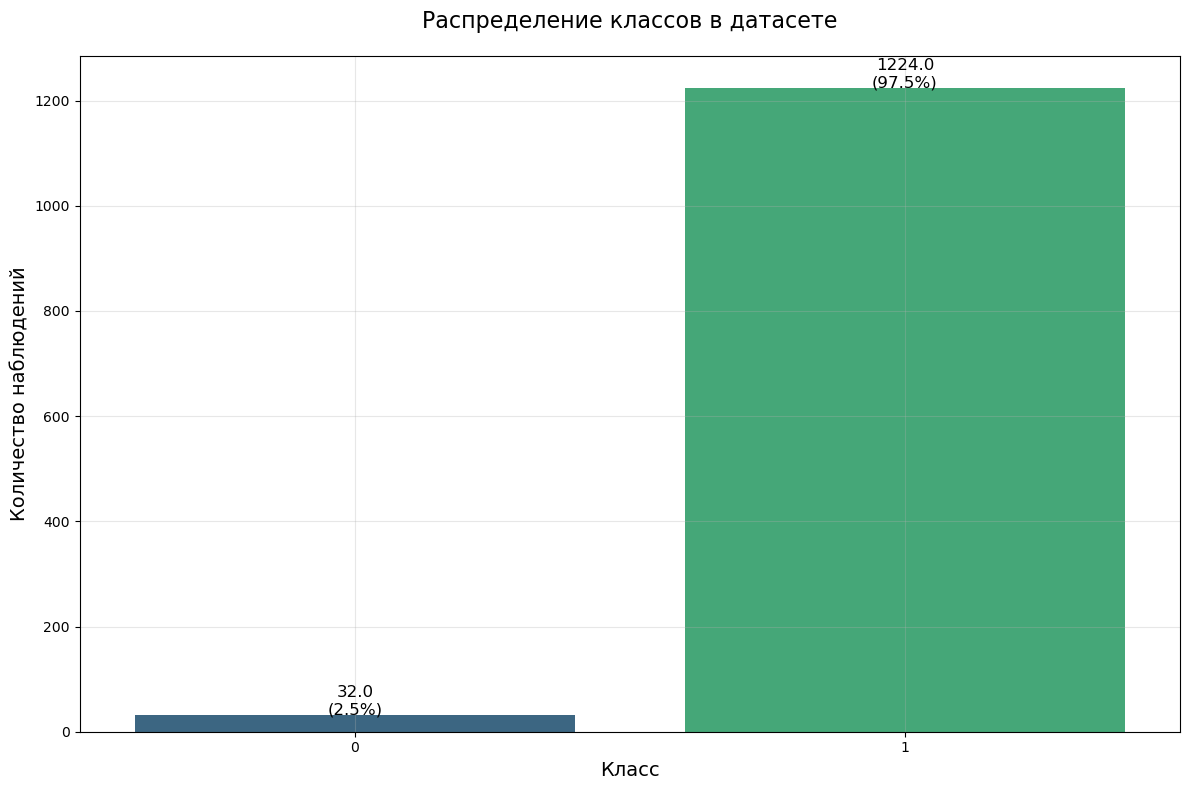


Удаление нечисловых колонок...

Удаление колонок с нулевыми значениями...

Удаление колонок с одной уникальной переменной...

Анализ пропущенных значений:
Series([], dtype: int64)


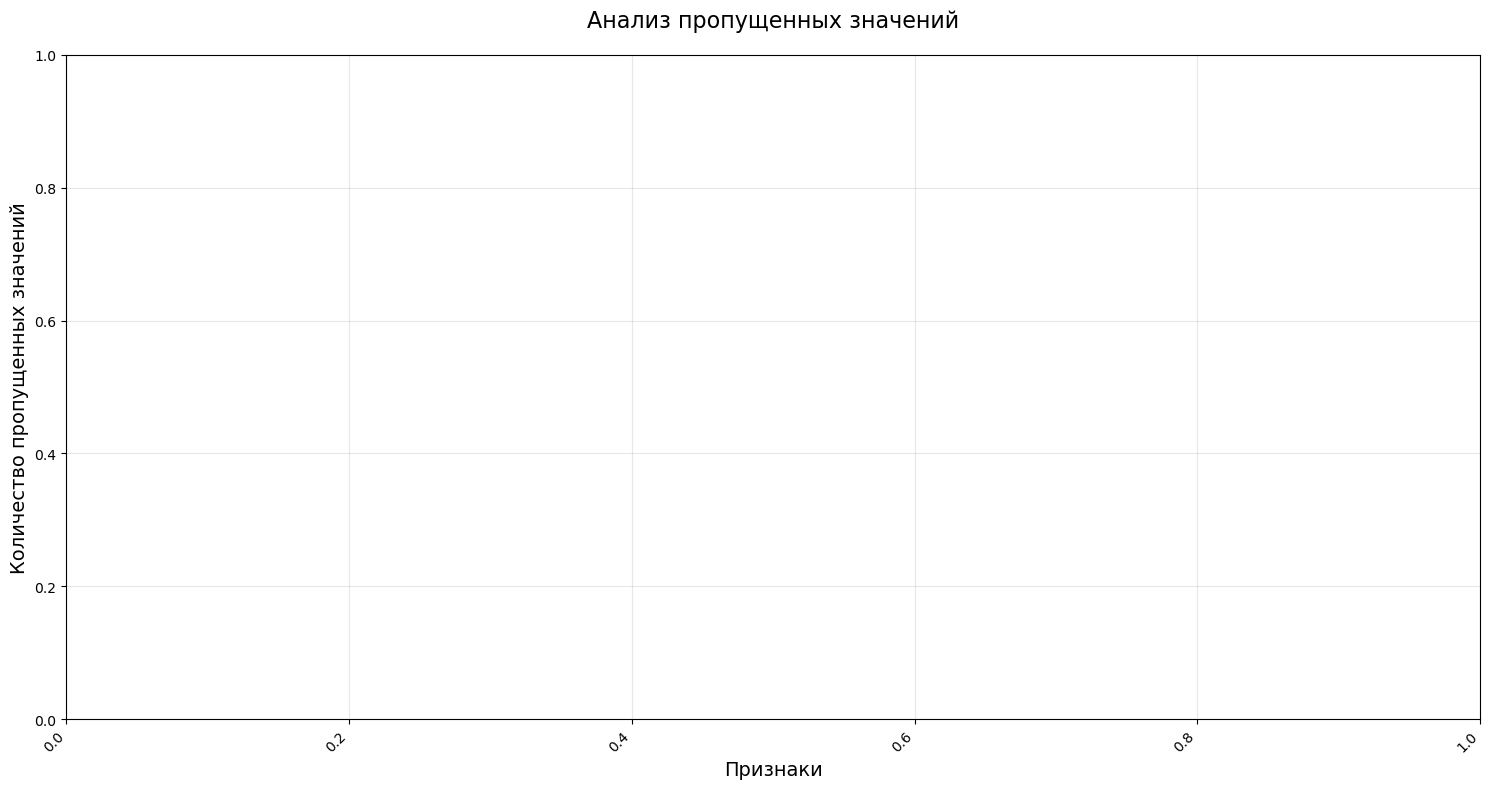


Удаление колонок с высокой долей пропущенных значений...

Анализ корреляций...


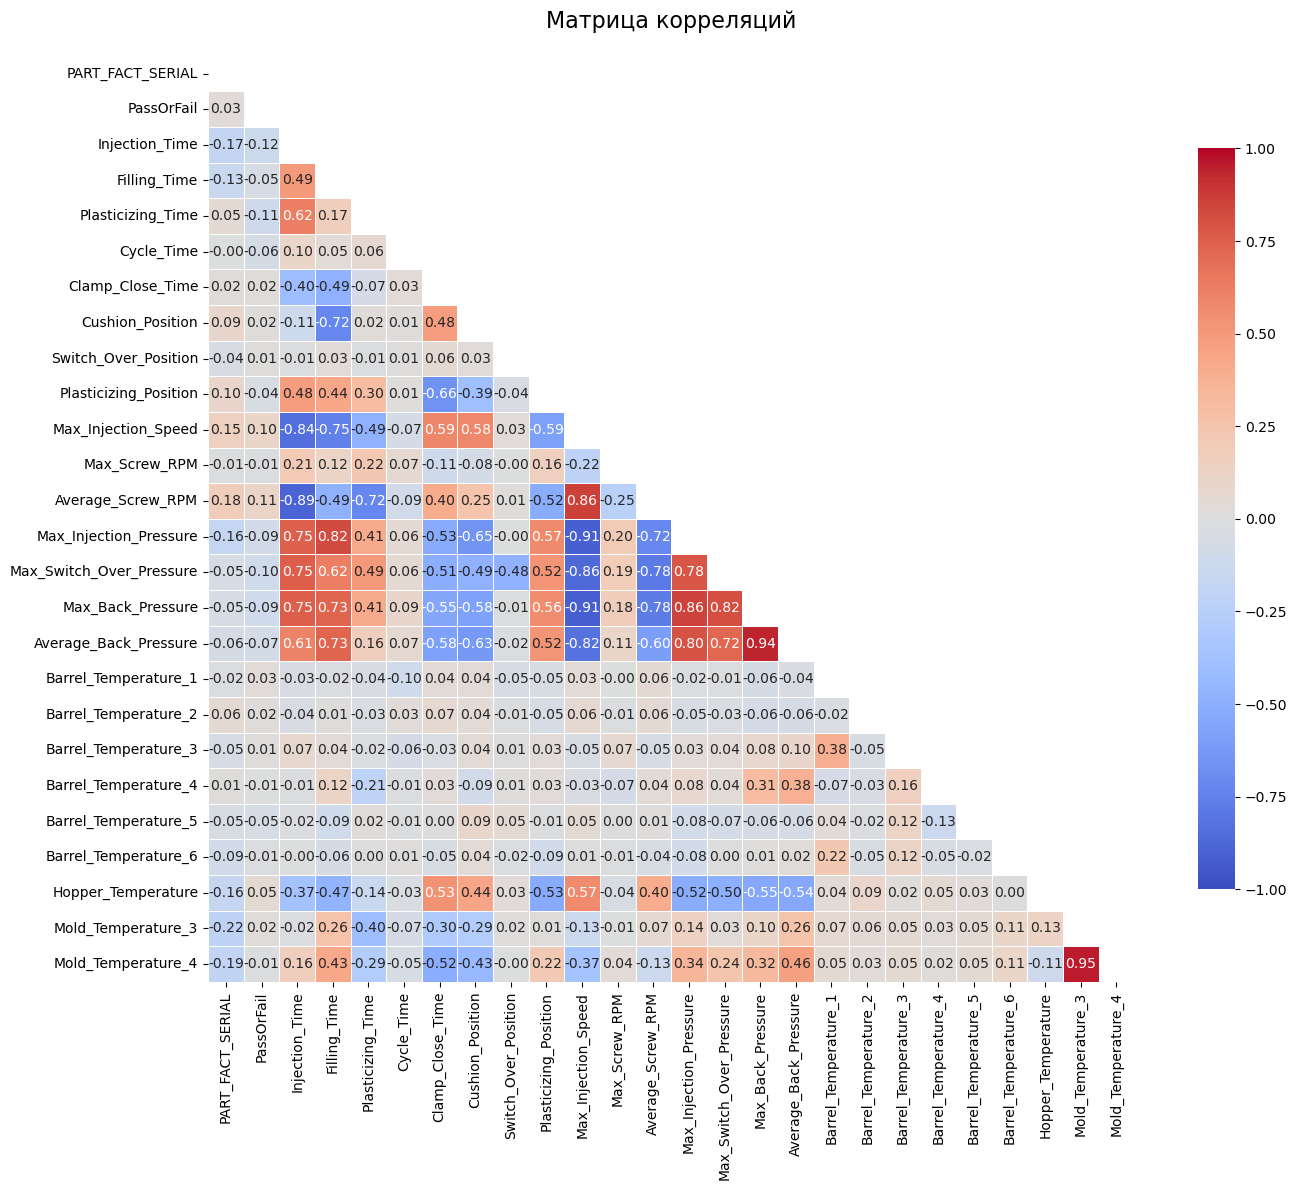


Удаление коррелирующих признаков...

Анализ выбросов...

Количество выбросов по признакам:
PART_FACT_SERIAL             84
PassOrFail                   32
Injection_Time               90
Filling_Time                  1
Plasticizing_Time            71
Cycle_Time                   72
Clamp_Close_Time              0
Cushion_Position              0
Switch_Over_Position          4
Plasticizing_Position        11
Max_Injection_Speed          71
Max_Screw_RPM                18
Average_Screw_RPM            74
Max_Switch_Over_Pressure     75
Barrel_Temperature_1         26
Barrel_Temperature_2          4
Barrel_Temperature_3        119
Barrel_Temperature_4          0
Barrel_Temperature_5         22
Barrel_Temperature_6          0
Hopper_Temperature            8
Mold_Temperature_3            0
dtype: int64


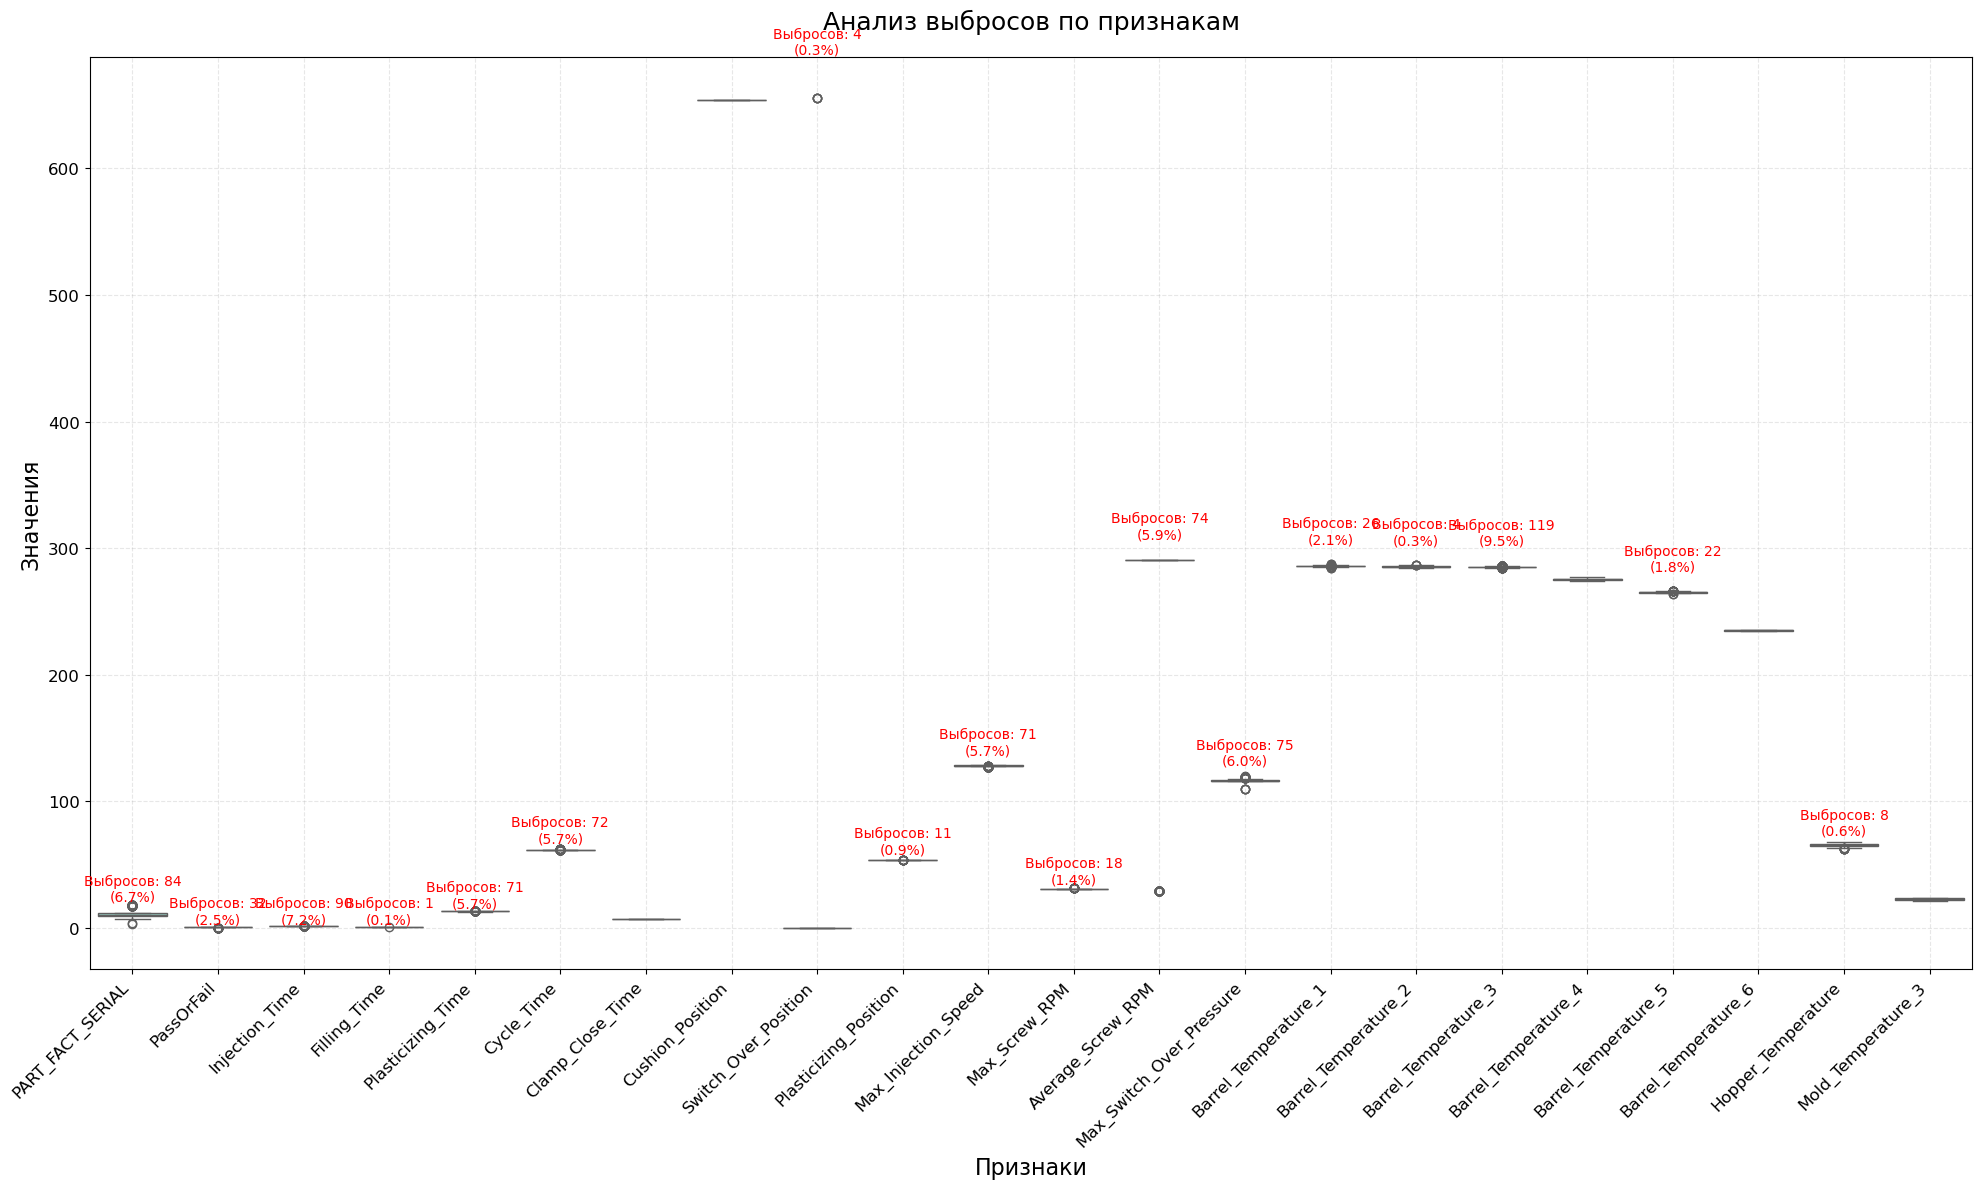


Разделение данных на train и test...

Нормализация признаков...


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import pandas as pd
import numpy as np
from model import df_filtered, X, y, results_df, best_model_pipeline

In [ ]:
def create_presentation():
    # Создание PDF файла
    with PdfPages('model_analysis_presentation.pdf') as pdf:
        # Установка стиля для графиков / Setting style for plots
        plt.style.use('ggplot')  # Используем стиль ggplot вместо seaborn
        
        # Титульный слайд
        plt.figure(figsize=(15, 10))
        plt.text(0.5, 0.5, 'Анализ моделей машинного обучения\nдля предсказания PassOrFail',
                horizontalalignment='center', verticalalignment='center',
                fontsize=24, fontweight='bold')
        plt.axis('off')
        pdf.savefig()
        plt.close()
        
        # Слайд с описанием данных
        plt.figure(figsize=(15, 10))
        plt.text(0.1, 0.8, 'Описание данных:', fontsize=20, fontweight='bold')
        plt.text(0.1, 0.7, f'Количество наблюдений: {len(df_filtered)}', fontsize=16)
        plt.text(0.1, 0.6, f'Количество признаков: {len(X.columns)}', fontsize=16)
        plt.text(0.1, 0.5, f'Распределение классов:\n{df_filtered["PassOrFail"].value_counts(normalize=True)}', fontsize=16)
        plt.axis('off')
        pdf.savefig()
        plt.close()
        
        # Слайд с визуализацией распределения классов
        plt.figure(figsize=(15, 10))
        sns.countplot(x='PassOrFail', data=df_filtered)
        plt.title('Распределение классов в датасете', fontsize=20)
        plt.grid(True, alpha=0.3)
        pdf.savefig()
        plt.close()
        
        # Слайд с описанием предобработки данных
        plt.figure(figsize=(15, 10))
        plt.text(0.1, 0.8, 'Предобработка данных:', fontsize=20, fontweight='bold')
        plt.text(0.1, 0.7, '1. Загрузка и фильтрация данных', fontsize=16)
        plt.text(0.1, 0.65, '2. Преобразование целевой переменной', fontsize=16)
        plt.text(0.1, 0.6, '3. Анализ типов данных', fontsize=16)
        plt.text(0.1, 0.55, '4. Удаление нечисловых колонок', fontsize=16)
        plt.text(0.1, 0.5, '5. Удаление колонок с нулевыми значениями', fontsize=16)
        plt.text(0.1, 0.45, '6. Удаление колонок с одной уникальной переменной', fontsize=16)
        plt.text(0.1, 0.4, '7. Удаление колонок с высокой долей пропущенных значений', fontsize=16)
        plt.text(0.1, 0.35, '8. Анализ корреляций', fontsize=16)
        plt.text(0.1, 0.3, '9. Удаление коррелирующих признаков', fontsize=16)
        plt.text(0.1, 0.25, '10. Обработка пропущенных значений', fontsize=16)
        plt.text(0.1, 0.2, '11. Обработка выбросов', fontsize=16)
        plt.text(0.1, 0.15, '12. Нормализация признаков', fontsize=16)
        plt.axis('off')
        pdf.savefig()
        plt.close()
        
        # Слайд с анализом типов данных
        plt.figure(figsize=(15, 10))
        plt.text(0.1, 0.8, 'Анализ типов данных:', fontsize=20, fontweight='bold')
        plt.text(0.1, 0.7, 'Типы данных в датасете:', fontsize=16)
        plt.text(0.1, 0.6, str(df_filtered.dtypes), fontsize=14)
        plt.axis('off')
        pdf.savefig()
        plt.close()
        
        # Слайд с анализом пропущенных значений
        plt.figure(figsize=(15, 10))
        missing_values = df_filtered.isnull().sum()
        plt.bar(range(len(missing_values)), missing_values.values)
        plt.title('Количество пропущенных значений по признакам', fontsize=20)
        plt.xticks(range(len(missing_values)), missing_values.index, rotation=45)
        plt.grid(True, alpha=0.3)
        pdf.savefig()
        plt.close()
        
        # Слайд с анализом корреляций
        plt.figure(figsize=(15, 10))
        correlation_matrix = df_filtered.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Матрица корреляций', fontsize=20)
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        
        # Слайд с анализом выбросов
        plt.figure(figsize=(15, 10))
        plt.text(0.1, 0.8, 'Анализ выбросов:', fontsize=20, fontweight='bold')
        Q1 = df_filtered.quantile(0.25)
        Q3 = df_filtered.quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df_filtered < (Q1 - 1.5 * IQR)) | (df_filtered > (Q3 + 1.5 * IQR))).sum()
        plt.text(0.1, 0.7, 'Количество выбросов по признакам:', fontsize=16)
        plt.text(0.1, 0.6, str(outliers), fontsize=14)
        plt.axis('off')
        pdf.savefig()
        plt.close()
        
        # Слайд с визуализацией выбросов
        plt.figure(figsize=(15, 10))
        sns.boxplot(data=df_filtered)
        plt.title('Boxplot признаков', fontsize=20)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        pdf.savefig()
        plt.close()
        
        # Слайд с распределением признаков до нормализации
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(df_filtered.columns, 1):
            plt.subplot(3, 3, i)
            sns.histplot(data=df_filtered[col], kde=True)
            plt.title(f'Распределение {col}')
            plt.grid(True, alpha=0.3)
            if i == 9:  # Ограничиваем количество графиков
                break
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        
        # Слайд с распределением признаков после нормализации
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(X.columns, 1):
            plt.subplot(3, 3, i)
            sns.histplot(data=X[col], kde=True)
            plt.title(f'Распределение {col} (нормализованное)')
            plt.grid(True, alpha=0.3)
            if i == 9:  # Ограничиваем количество графиков
                break
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        
        # Слайд с итоговым набором признаков
        plt.figure(figsize=(15, 10))
        plt.text(0.1, 0.8, 'Итоговый набор признаков:', fontsize=20, fontweight='bold')
        plt.text(0.1, 0.7, f'Количество признаков до предобработки: {len(df_filtered.columns)}', fontsize=16)
        plt.text(0.1, 0.6, f'Количество признаков после предобработки: {len(X.columns)}', fontsize=16)
        plt.text(0.1, 0.5, 'Оставшиеся признаки:', fontsize=16)
        plt.text(0.1, 0.4, '\n'.join(X.columns), fontsize=14)
        plt.axis('off')
        pdf.savefig()
        plt.close()
        
        # Слайд с описанием моделей
        plt.figure(figsize=(15, 10))
        plt.text(0.1, 0.8, 'Использованные модели:', fontsize=20, fontweight='bold')
        plt.text(0.1, 0.7, '1. Logistic Regression', fontsize=16)
        plt.text(0.1, 0.6, '2. Random Forest', fontsize=16)
        plt.text(0.1, 0.5, '3. Gradient Boosting', fontsize=16)
        plt.text(0.1, 0.4, '4. SVM', fontsize=16)
        plt.text(0.1, 0.3, '5. KNN', fontsize=16)
        plt.text(0.1, 0.2, '6. XGBoost', fontsize=16)
        plt.text(0.1, 0.1, '7. LightGBM', fontsize=16)
        plt.axis('off')
        pdf.savefig()
        plt.close()
        
        # Слайд с методами балансировки
        plt.figure(figsize=(15, 10))
        plt.text(0.1, 0.8, 'Методы балансировки классов:', fontsize=20, fontweight='bold')
        plt.text(0.1, 0.7, '1. Original (без балансировки)', fontsize=16)
        plt.text(0.1, 0.6, '2. SMOTE', fontsize=16)
        plt.text(0.1, 0.5, '3. Random UnderSampling', fontsize=16)
        plt.text(0.1, 0.4, '4. SMOTEENN', fontsize=16)
        plt.axis('off')
        pdf.savefig()
        plt.close()
        
        # Слайд с ROC-кривыми
        plt.figure(figsize=(15, 10))
        plt.text(0.1, 0.8, 'ROC-кривые моделей:', fontsize=20, fontweight='bold')
        plt.text(0.1, 0.7, 'ROC-кривая показывает соотношение между:', fontsize=16)
        plt.text(0.1, 0.6, '- True Positive Rate (TPR)', fontsize=16)
        plt.text(0.1, 0.5, '- False Positive Rate (FPR)', fontsize=16)
        plt.text(0.1, 0.4, 'AUC-ROC показывает общую производительность модели', fontsize=16)
        plt.axis('off')
        pdf.savefig()
        plt.close()
        
        # Слайд с результатами
        plt.figure(figsize=(15, 10))
        plt.text(0.1, 0.8, 'Результаты моделей:', fontsize=20, fontweight='bold')
        best_model = results_df.loc[results_df['roc_auc'].idxmax()]
        plt.text(0.1, 0.7, f'Лучшая модель: {best_model["model_name"]}', fontsize=16)
        plt.text(0.1, 0.6, f'Метод балансировки: {best_model["sampling_name"]}', fontsize=16)
        plt.text(0.1, 0.5, f'AUC-ROC: {best_model["roc_auc"]:.3f}', fontsize=16)
        plt.text(0.1, 0.4, f'PR AUC: {best_model["pr_auc"]:.3f}', fontsize=16)
        plt.axis('off')
        pdf.savefig()
        plt.close()
        
        # Слайд с важностью признаков
        plt.figure(figsize=(15, 10))
        plt.text(0.1, 0.8, 'Важность признаков:', fontsize=20, fontweight='bold')
        plt.text(0.1, 0.7, 'Анализ важности признаков показывает:', fontsize=16)
        plt.text(0.1, 0.6, '1. Какие признаки наиболее значимы для предсказания', fontsize=16)
        plt.text(0.1, 0.5, '2. Какие признаки можно исключить', fontsize=16)
        plt.text(0.1, 0.4, '3. Взаимосвязи между признаками', fontsize=16)
        plt.axis('off')
        pdf.savefig()
        plt.close()
        
        # Слайд с итоговым пайплайном
        plt.figure(figsize=(15, 10))
        plt.text(0.1, 0.8, 'Итоговый пайплайн:', fontsize=20, fontweight='bold')
        plt.text(0.1, 0.7, '1. Предобработка данных', fontsize=16)
        plt.text(0.1, 0.6, '2. Нормализация признаков', fontsize=16)
        plt.text(0.1, 0.5, '3. Балансировка классов', fontsize=16)
        plt.text(0.1, 0.4, '4. Обучение модели', fontsize=16)
        plt.text(0.1, 0.3, '5. Предсказание', fontsize=16)
        plt.axis('off')
        pdf.savefig()
        plt.close()
        
        # Заключительный слайд
        plt.figure(figsize=(15, 10))
        plt.text(0.5, 0.5, 'Спасибо за внимание!',
                horizontalalignment='center', verticalalignment='center',
                fontsize=24, fontweight='bold')
        plt.axis('off')
        pdf.savefig()
        plt.close()

if __name__ == "__main__":
    create_presentation()
    print("Презентация успешно создана: model_analysis_presentation.pdf") 